# **Final Notebook**

# Introduction

# Submetric Analysis:

## Amount of Restaurants by Neighborhood  

### By: Gavin Fehl

##### Datasets: [Allegheny County Assets](https://data.wprdc.org/dataset/allegheny-county-assets )

### CSV Manipulation Machine
The Following cell collects the massive dataset from "alleghenyassetmap.csv" and compacts it down into "assets.csv" which for all assets now holds only the asset's name, neighborhood in which it resides, and the tyoe of asset that it is. The neighborhood was not within the data so it had to be determined for each. *It takes a long time to run as the dataset is large*, we later found a faster better was to do this for the asbestos dataset, but this is what I started with, I put it in a csv so that the net step could be done repeatedly without having to run this behemoth every time.

In [ ]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 

In [17]:
# default dict to determine type
def def_value(): 
    return 'string'
# initialize coords from csv
d = defaultdict(def_value) 
d["latitude"] = 'float'
d["longitude"] = 'float'
d["asset_type"] = 'str'
d["_id"] = 'int'
d["name"] = 'str'

# places and assets
places = pd.read_csv("alleghenyassetmap.csv", usecols=['_id', 'name', 'asset_type', 'latitude', 'longitude'], index_col="_id", dtype=d)
assets = pd.DataFrame(columns=('name', 'asset_type', 'neighborhood',))


#for every lat and long determine neighborhood and add the information to a csv
for index, row in places.iterrows():
    # Latitude & Longitude input
    Latitude = row['latitude']
    Longitude = row['longitude']

    location = fpsnippets.geo_to_neighborhood(Latitude, Longitude)
    
    if location != None :
        # data in this row
        new_row = pd.Series(
            {"name": row['name'],
             "asset_type": row['asset_type'],
             "neighborhood": location})
        #append row's data to assets
        assets = pd.concat([assets, new_row.to_frame().T], ignore_index=True)
        
#assets ro csv: relevantplaces.csv
assets.to_csv('assets.csv', sep=',', index=False, encoding='utf-8')
        

### More CSV Magic and a Graph also, Yay!

The following code block takes the simplified data from "assets.csv" and counts how many of a desired asset (restauraunts in this case) each neighborhood has, it puts this data in "neighborhood_counts.csv" as well as graphs it visually. The csv certainly need not to be made, but it certainly helped in troubleshooting, so made it was.

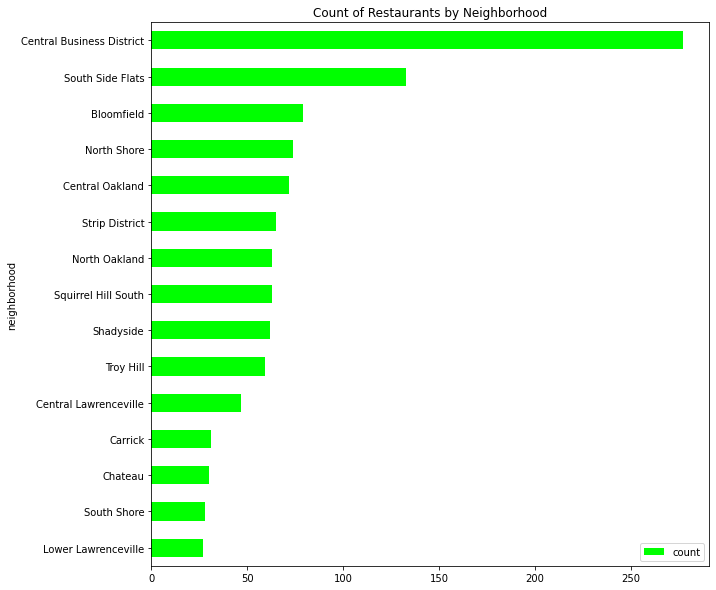

In [2]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 

# places and relevant places
assets = pd.read_csv("assets.csv", usecols=['name', 'asset_type', 'neighborhood'], dtype=str)
desired_asset = 'restaurants'

all_desired_assets = assets[assets['asset_type'] == desired_asset]

# Group by 'neighborhood' and count the number of the desired assets in each neighborhood
neighborhood_counts = all_desired_assets.groupby('neighborhood').size().reset_index(name='restaurant_count')
neighborhood_counts.columns = ['neighborhood', 'count']
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=True)


# Save the result to a new CSV file
neighborhood_counts.to_csv('neighborhood_counts.csv', index=False)
ax = neighborhood_counts.tail(15).plot.barh(color="lime", x='neighborhood', y='count', figsize=(10, 10,), title='Count of '+desired_asset.capitalize()+' by Neighborhood')

### Analysis
Our rat families love to eat, and thus I plotted the top 15 places for restaurants in Pittsburgh! This doesn't necessarily account for the size of the neighborhood, but being a large neighborhood comes with pros and cons... One pro is more room for restaurants... and rats. The rats will feast on the bountiful leftovers from locations like the Central Business District, South Side Flats, and Bloomfield. As far as restaurant quantity the neighborhoods at the top of this graph take the cake! Central Business District had a whopping 277, so thats the best place for them to snack on leftovers...

or seek employment:
![employment](https://media.giphy.com/media/wNDa1OZtvl6Fi/giphy.gif)

# Asbestos Permits Analysis

### By: Amy Zhang

##### Dataset: [Asbestos Permit Data](https://data.wprdc.org/dataset/allegheny-county-asbestos-permit/resource/0a5408a4-8358-4b14-9317-090db7c61fd9)

### Measurement- Ease of which rats can be left alone
One measure of rat family "sliving" (slaying, living) is how great of a chance that pesky humans will not encroach on their space. Asbestos permits are a great way to measure the abandonment of buidings, as very few humans will be here, guaranteeing the rats no need to share a living space with people that want to kill them. 

The way this is measured is by ranking the top 15 neighborhoods with the most active asbestos permits.

In [3]:
# Load in asbestos permits dataset
asbestos = pd.read_csv("Asbestos.csv")
asbestos.head()

#Narrow it down to only active ones (status column is active)
asbestos_active= asbestos[asbestos["status"]== "ACTIVE"]
#count = len(newAsbestos)
#print(row_count)
asbestos_active.head()

,_id,permit_number,s_name,s_address,city,z_code,p_fee,pa_license_no,contractor_name,permit_specifications,...,i_date,e_date,achd_inspector,job_complete,is_permit_date_extended,permit_o_e_date,project_type,status,latitude,longitude
915,1878800,PAA232002,DUQUESNE LIGHT COMPANY- 2825 NEW BEAVER AVE,NaN,PITTSBURGH,15233,850.0,918.0,DUQUESNE LIGHT COMPANY,REMOVE ARC-PROOF TAPE/PROOFING CEMENT IN VARIO...,...,2023-01-01,2023-12-31,CALI FEENEY,f,f,2023-12-31,PAA,ACTIVE,40.463914,-80.045183
1079,1878964,PAA234088,MUNICIPALITY REGULATED PROPERTY,320 COLLINS DRIVE,PITTSBURGH,15235,350.0,902.0,"AMERICAN CONTRACTING ENTERPRISES, INC.",REMOVE ASBESTOS CONTAINING DEBRIS THROUGHOUT S...,...,2023-01-23,2023-12-31,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.465340,-79.812024
1193,1879078,PAA234055,CITY OF MCKEESPORT REGULATED PROPERTY,910 SOLES STREET,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.347608,-79.848797
1194,1879079,PAA234074,CITY OF MCKEESPORT REGULATED PROPERTY,705 VERNER ALLEY,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.349502,-79.856440
1241,1879126,PAA234054,CITY OF MCKEESPORT REGULATED PROPERTY,908 SOLES STREET,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.347678,-79.848843


I filtered the data to include only the “active” status permits, as the “complete” status could mean the building or zone is already renovated or demolished. It would be nice for the rats to have a nice renovated home, but I did not want to take the chance that the building was no longer standing. This could also mean this zone is an active construction area, meaning there is increased danger around as it is a heavily tafficked area with many humans and construction machines around. We cannot have that for our rat family. An active status could mean that the building is simply being prepared for renovation or demolition, and a lot of them stand empty and abandoned for months before demolition. This guarantees that there are no meddling people or construction workers, ensuring survival for our rats. 

[source](https://www.alleghenycounty.us/uploadedFiles/Allegheny_Home/Health_Department/Programs/Air_Quality/2022_Asbestos-Fact-Sheet-new.pdf )


In [4]:
# create a data dict for the columns
newAsbestos = pd.DataFrame(columns=['permit number', 'lat', 'long', 'neighborhood'])
newAsbestos = newAsbestos.astype({
    "permit number": str,
    "lat": float,
    "long": float,
    "neighborhood": str
})
# new columns
newAsbestos["permit number"] = asbestos_active["permit_number"]
newAsbestos["lat"] = asbestos_active["latitude"]
newAsbestos["long"] = asbestos_active["longitude"]

newAsbestos.head()

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,NaN
1079,PAA234088,40.465340,-79.812024,NaN
1193,PAA234055,40.347608,-79.848797,NaN
1194,PAA234074,40.349502,-79.856440,NaN
1241,PAA234054,40.347678,-79.848843,NaN


In [6]:
# Use fpsnippets to get permits sorted into neighborhoods, fill neighborhood columns with names
for index, row in newAsbestos.iterrows():
    latit = row["lat"]
    longi= row["long"]
    neighborhood_name= fpsnippets.geo_to_neighborhood(latit,longi)
    newAsbestos.loc[index, 'neighborhood'] = neighborhood_name
newAsbestos.head(20)

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,Marshall-Shadeland
1079,PAA234088,40.465340,-79.812024,None
1193,PAA234055,40.347608,-79.848797,None
1194,PAA234074,40.349502,-79.856440,None
1241,PAA234054,40.347678,-79.848843,None
1242,PAA234059,40.346880,-79.848437,None
1261,PAA234060,40.346362,-79.848383,None
1271,PAA234066,40.341071,-79.849485,None
1475,PAA234075,40.348036,-79.853904,None
1578,DEM220308,40.493368,-79.783177,None


I am only interested in the datapoints that contain a neighborhood in Pittsburgh, so I used a query mask to exclude the Neighborhoods with "None".

In [7]:
# Exclude none neighborhoods
neighborhood_notNone_mask = (newAsbestos['neighborhood'].notnull())

# Apply the mask to filter the DataFrame
filtered_newAsbestos = newAsbestos[neighborhood_notNone_mask]

# Display the filtered DataFrame
filtered_newAsbestos.head()

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,Marshall-Shadeland
2885,PAA220604,40.442581,-79.961792,West Oakland
4487,PAA230027,40.442247,-79.960929,West Oakland
5459,PAA224562,40.470131,-80.026204,Marshall-Shadeland
5507,PAA220599,40.444310,-79.953197,North Oakland


An additional step so we can see the ones that fall on the bottom and the top of the rankings is creating a new csv out of this dataframe:

In [8]:
# change into a csv
filtered_newAsbestos.to_csv("filtered_newAsbestos.csv", sep=',', index= False, encoding = 'utf-8')

Now, it's time to rank the neighborhoods based on the ones with the most active asbestos permits!

In [9]:
# count the stuff
filtered_newAsbestos['neighborhood'].value_counts()

Central Business District    24
Homewood North               15
North Oakland                12
West Oakland                 11
Squirrel Hill North           7
Marshall-Shadeland            6
Spring Garden                 6
Central Oakland               6
Bluff                         5
Perry North                   5
Shadyside                     4
Perry South                   4
South Side Flats              4
Bloomfield                    4
East Hills                    3
Squirrel Hill South           3
Central Northside             3
Lincoln-Lemington-Belmar      3
Fineview                      2
Beechview                     2
Sheraden                      2
Knoxville                     2
Allegheny Center              2
Brighton Heights              2
Elliott                       2
Chateau                       2
Fairywood                     2
Homewood South                1
Hazelwood                     1
Spring Hill-City View         1
Overbrook                     1
Westwood

Let's visualize...

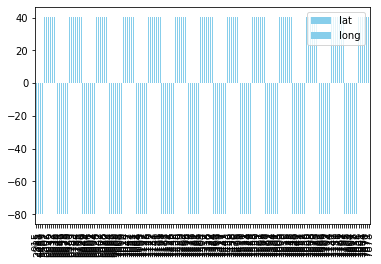

In [10]:
filtered_newAsbestos.plot(kind='bar', color='skyblue')

This basic way of plotting only plotted the coordinates. That shows me nothing!! Second try:

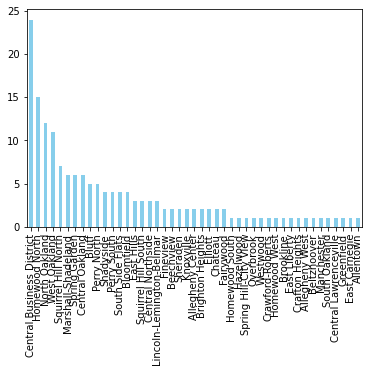

In [11]:
# oh thats not...

# plot the count
counts = filtered_newAsbestos['neighborhood'].value_counts()
counts.plot(kind='bar', color='skyblue')

Since I am only interested in seeing the neighborhoods with the most active asbestos permits, I just want to see the top 15:

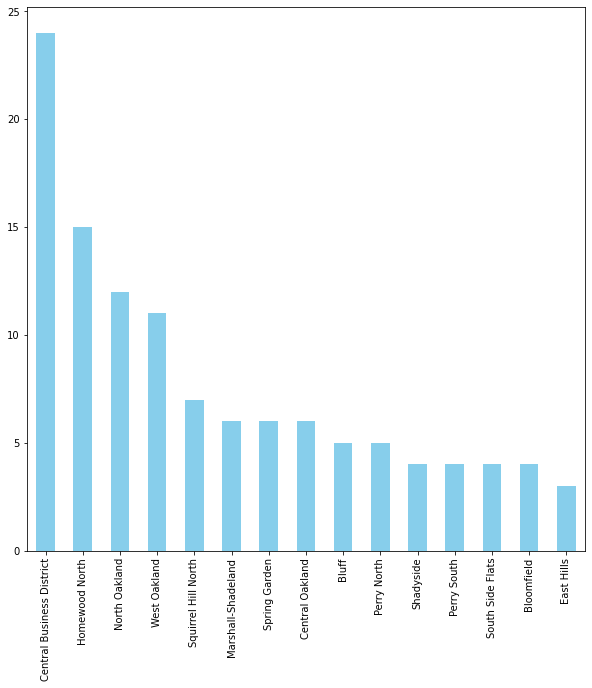

In [12]:
# only do the top 15
counts.head(15).plot(kind='bar', color='skyblue', figsize=(10, 10,))

And the winner is obvious. The Central Business District comes in at #1 with 24 active asbestos permits!! Typically, buildings have these permits when they are preparing to be demolished (think tented, abandonded, uncared for). This would be a perfect environment for our family of rats to settle in. Rats are hardy creatures, so they can get their footing here amidst the dilapidated buildings. 

## Amount of Smart Trash Cans by Neighborhood  

### By: Amy Zhang and Gavin Fehl

##### Datasets: [Smart Trash Containers](https://data.wprdc.org/dataset/smart-trash-containers/resource/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9)

This is code that we wrote together. We used a combined version of our methods with this dataset. 

### METHOD
The thought process here was that smart trash cans have a sensor that detects how full they are. While they are good for eliminating waste in the city, this means they will be emptied more often, meaning our rats can't forage freely in weeks-old sandwiches and apples. 

[source](https://pittsburghpa.gov/press-releases/press-releases.html?id=2986)

this is them in the trashcan:
![this is them in the trashcan](https://media.giphy.com/media/nJ2PObJA3EVgc/giphy.gif)


#### First, load pandas, fpsnippets

In [13]:
import pandas as pd
%matplotlib inline
import fpsnippets 

In [14]:
#Load in trashcans dataset
SmartTrash= pd.read_csv("SmartTrash.csv")
SmartTrash.head(3)

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,228688,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,228689,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,228690,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625


In [15]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 
  
# default dict to determine type
def def_value(): 
    return 'string'
# initialize coords from csv
d = defaultdict(def_value) 
d["x"] = 'float'
d["y"] = 'float'
d["_id"] = 'int'
d["container_id"] = 'int'

# places and assets
places = pd.read_csv("SmartTrash.csv", usecols=['_id', 'container_id', 'x', 'y'], index_col="_id", dtype=d)
trashys = pd.DataFrame(columns=('container_id', 'neighborhood',))


#for every lat and long determine neighborhood and add the information to a csv
for index, row in places.iterrows():
    # Latitude & Longitude input
    Latitude = row['y']
    Longitude = row['x']
    location = fpsnippets.geo_to_neighborhood(Latitude, Longitude)
    
    if location != None :
        # data in this row
        new_row = pd.Series(
            {"container_id": row['container_id'],
             "neighborhood": location})
        #append row's data to assets
        trashys = pd.concat([trashys, new_row.to_frame().T], ignore_index=True)
        
#assets to csv
trashys.to_csv('trashcans.csv', sep=',', index=False, encoding='utf-8')

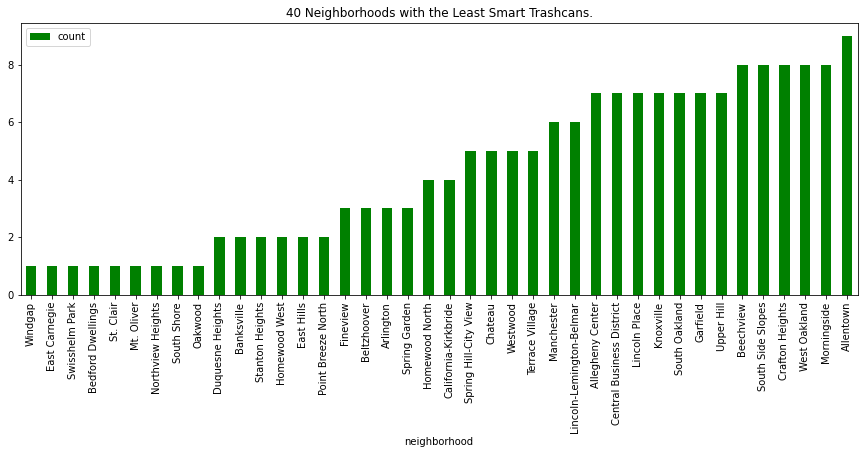

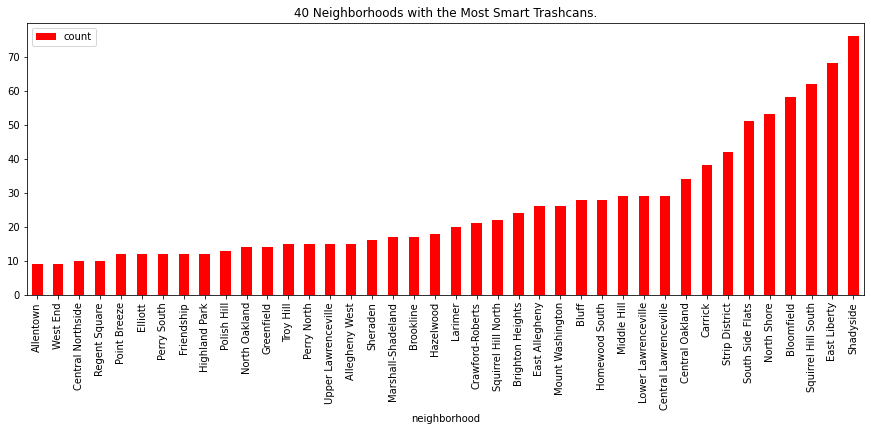

In [23]:
# places and relevant places
trashcans = pd.read_csv("trashcans.csv", usecols=['container_id', 'neighborhood'], dtype=str)

# Group by 'neighborhood' and count the number of the desired assets in each neighborhood
neighborhood_counts = trashcans.groupby('neighborhood').size().reset_index(name='restaurant_count')
neighborhood_counts.columns = ['neighborhood', 'count']
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=True)

# Save the result to a new CSV file
neighborhood_counts.to_csv('neighborhood_top_trash_counts.csv', index=False)
ax = neighborhood_counts.head(40).plot.bar(color= "green", x='neighborhood', y='count', figsize=(15, 5,), title='40 Neighborhoods with the Least Smart Trashcans.')
ax = neighborhood_counts.tail(40).plot.bar(color= "red", x='neighborhood', y='count', figsize=(15, 5,), title='40 Neighborhoods with the Most Smart Trashcans.')

### Analysis

Of neighborhoods with any trashcans at all, Windgap and several others tied for the least smart trashcans with 1. Our running champion so far (for rats), Central Business District, also has a low number still, with only 7. Shadyside had the most smart trashcans with 76. Do better, Shadyside...

One huge challenge was that it kept NOT showing the neighborhoods for the latitude and longitude despite using Griffin's amaze snippets. and Gavin was like, let's search up a coordinate and see where it pops up, what if its in antarctica?? And we were like hahahhaa as if. and then we just swapped the points, and it finally works. so we actually look up the coordinates as the way they are in the dataset. and guess where it was.. ANTARCTICA. so i would say that was the most challenging part of the project. 

# So Which Neighborhood is Best?: Final Analysis